## Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Step 2: Load the Dataset

In [3]:
df = pd.read_csv("titanic.csv")

# View the Summary Statistics of the Dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Step 3: Initial Exploration

In [4]:
# View the First Few Rows of the Dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Get Information About the Data Types and Non-null Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Count Missing Values in Each Columns
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Step 4: Handle Missing Values

In [6]:
# Fill missing 'Age' values with average age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fils missing 'Cabin' values with "Unknown"
df['Cabin'].fillna('Unknown', inplace=True)

# Removes rows with missing values
df.dropna(inplace=True)

<ipython-input-6-1da6188c5548>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-6-1da6188c5548>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [7]:
# Verify Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [8]:
# Verify Changes
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Step 5: Check for Duplicates

In [9]:
# Count duplicate rows
df.duplicated().sum()

0

In [10]:
# View the First Few Rows of the Dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


## Step 6: Identify and Handle Outliers

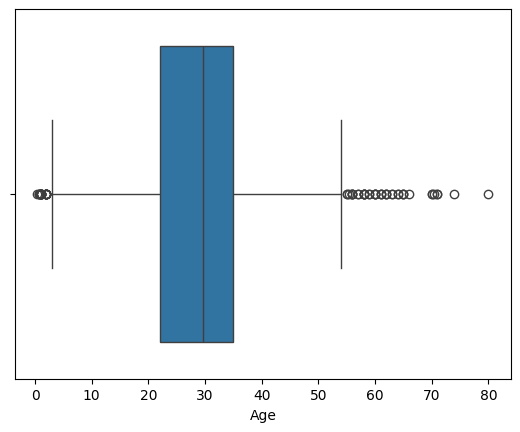

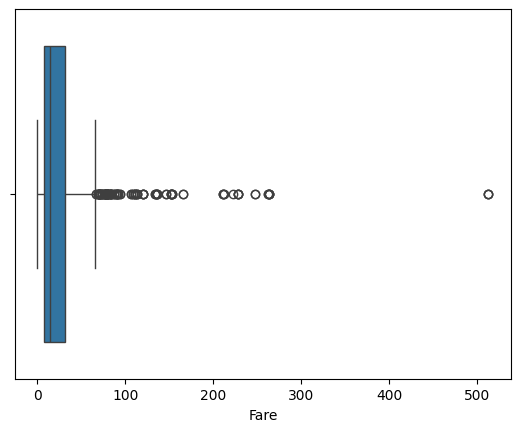

In [ ]:
# Age Outlier Check
sns.boxplot(x=df['Age'])
plt.show()

# Fare Outlier Check
sns.boxplot(x=df['Fare'])
plt.show()

#### Calculate IQR and Cap Outliers

In [12]:
# For Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# For Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

In [13]:
# Cap Age
df['Age'] = np.where(df['Age'] < lower_bound_age, lower_bound_age, df['Age'])
df['Age'] = np.where(df['Age'] > upper_bound_age, upper_bound_age, df['Age'])

# Cap Fare
df['Fare'] = np.where(df['Fare'] < lower_bound_fare, lower_bound_fare, df['Fare'])
df['Fare'] = np.where(df['Fare'] > upper_bound_fare, upper_bound_fare, df['Fare'])

In [ ]:
# View the Summary Statistics of the Age Column
print(df['Age'].describe())
print("\n+++++++++++++++++++++++++++++\n")
# View the Summary Statistics of the Fare Column
print(df['Fare'].describe())

count    889.000000
mean      29.338857
std       12.042608
min        2.500000
25%       22.000000
50%       29.699118
75%       35.000000
max       54.500000
Name: Age, dtype: float64

+++++++++++++++++++++++++++++

count    889.000000
mean      23.956061
std       20.414997
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max       65.656300
Name: Fare, dtype: float64


## Step 7: Recheck Outliers and Distribution

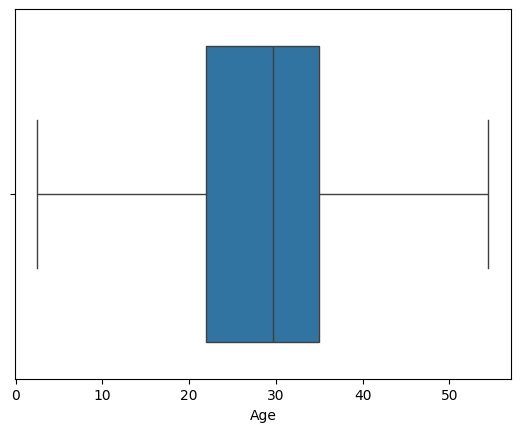

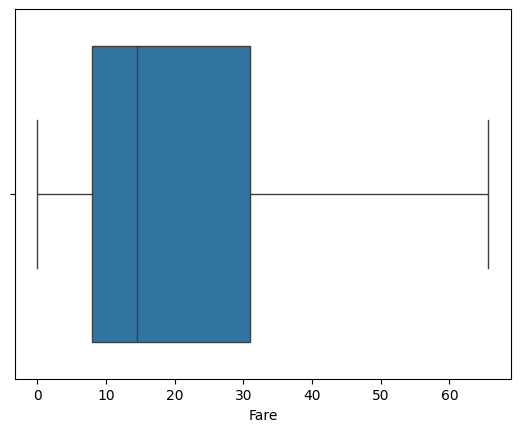

In [ ]:
# Age Boxplot
sns.boxplot(x=df['Age'])
plt.show()

# Fare Boxplot
sns.boxplot(x=df['Fare'])
plt.show()

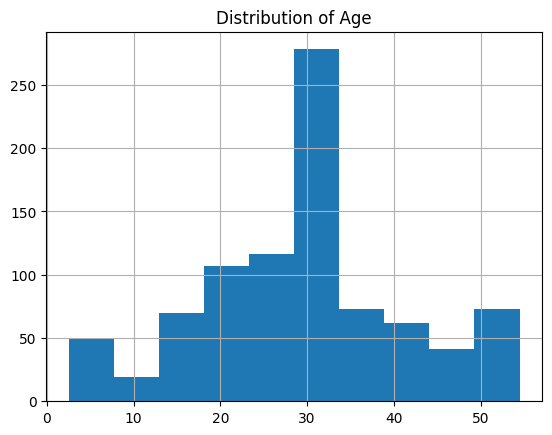

In [16]:
# Age Distribution
df['Age'].hist(bins=10)
plt.title('Distribution of Age')
plt.show()

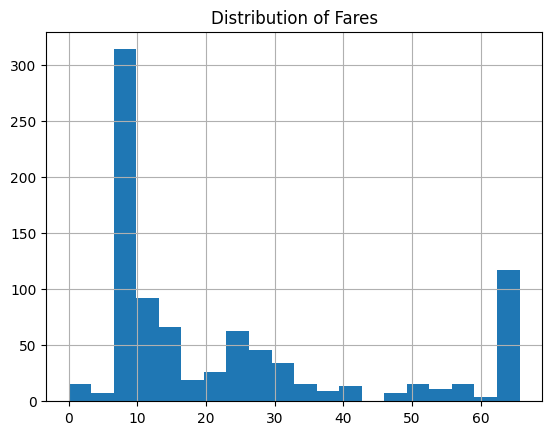

In [ ]:
# Fare Distribution
df['Fare'].hist(bins=20)
plt.title('Distribution of Fares')
plt.show()

## Step 8: Explore Other Features

In [ ]:
# Min and Max for 'SibSp'
print(df['SibSp'].min())
df['SibSp'].max()

0


8

Pclass
3    491
1    214
2    184
Name: count, dtype: int64





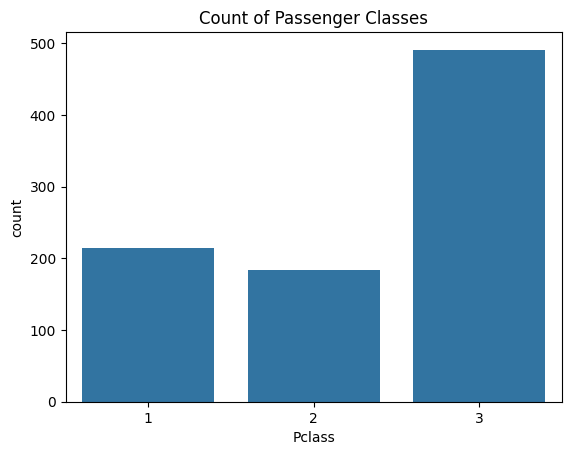

In [ ]:
# Passenger Class Distribution
print(df['Pclass'].value_counts())
print("\n\n")
sns.countplot(x='Pclass', data=df)
plt.title('Count of Passenger Classes')
plt.show()

Survived
0    549
1    340
Name: count, dtype: int64





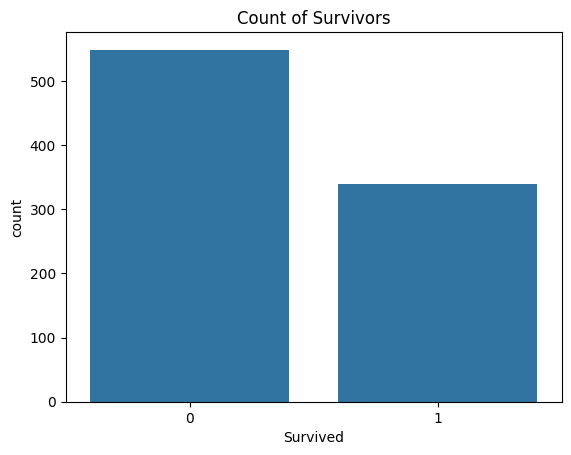

In [ ]:
# Count of Survivors
print(df['Survived'].value_counts())
print("\n\n")
sns.countplot(x='Survived', data=df)
plt.title('Count of Survivors')
plt.show()

## Step 9: Multivariate Analysis

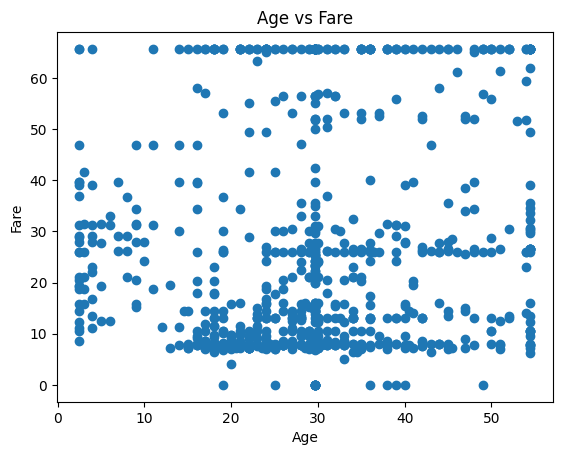

In [ ]:
# Scatter Plot of Age vs Fare
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

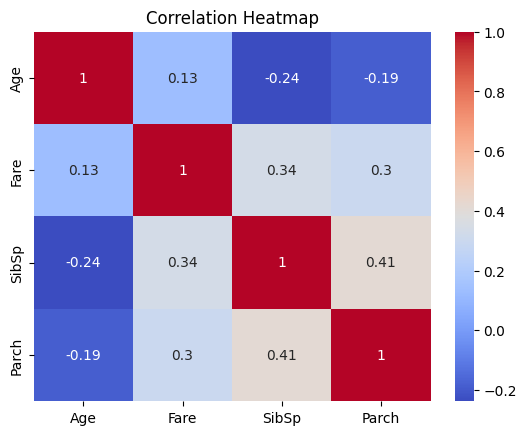

In [ ]:
# Correlation Heatmap
sns.heatmap(df[['Age', 'Fare', 'SibSp', 'Parch']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

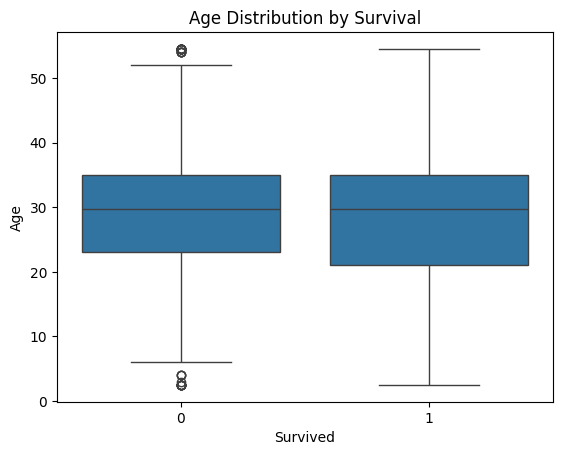

In [ ]:
# Age Distribution by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

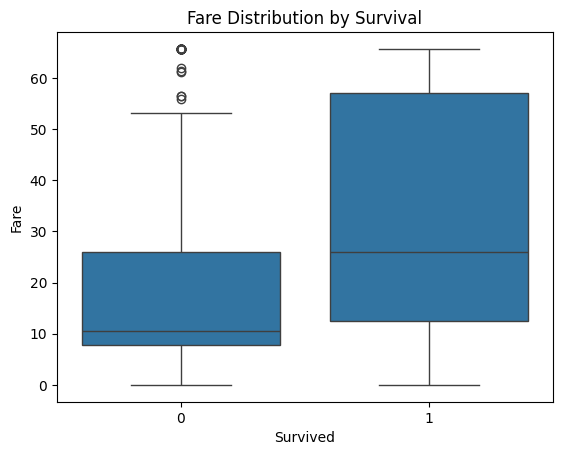

In [ ]:
# Age Distribution by Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

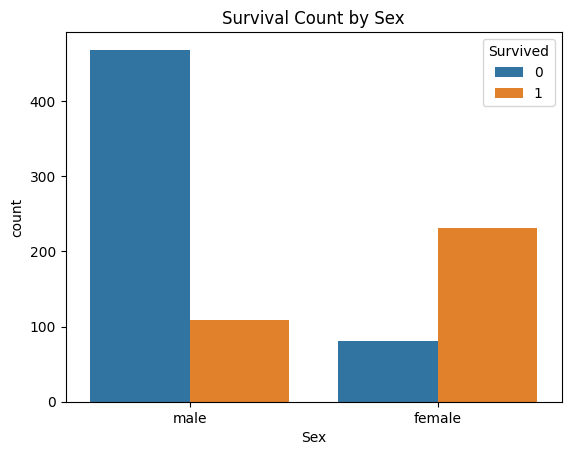

In [22]:
# Survival Count by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

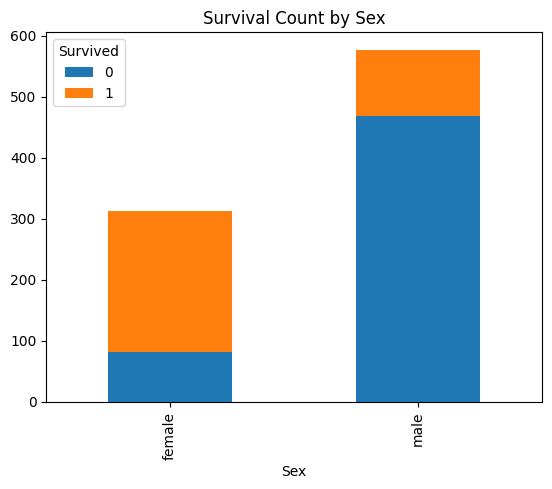

In [ ]:
# Survival Count by Sex
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.show()

In [26]:
survival_counts = df[df['Survived'] == 1].groupby('Sex').size()
total_counts = df['Sex'].value_counts()
survival_percentages_by_sex = round(survival_counts / total_counts * 100)
survival_percentages_by_sex

,0
Sex,
female,74.0
male,19.0


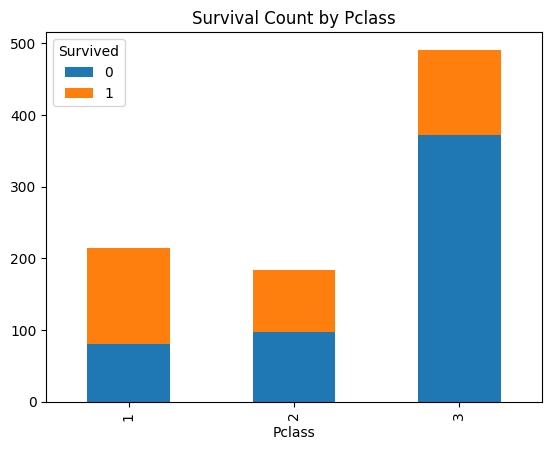

In [ ]:
# Survival Count by Pclass
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', stacked=True)
plt.title('Survival Count by Pclass')
plt.show()

In [ ]:
# Total Count for Each Embarked Value
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)
print("\n")

# Unique Embarked Values
df['Embarked'].unique()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64




array(['S', 'C', 'Q'], dtype=object)

In [27]:
# Survival Percentage by Embarked
survival_percentage = df.groupby('Embarked')['Survived'].mean() * 100
survival_percentage = survival_percentage.round(2)
print(survival_percentage)

Embarked
C    55.36
Q    38.96
S    33.70
Name: Survived, dtype: float64


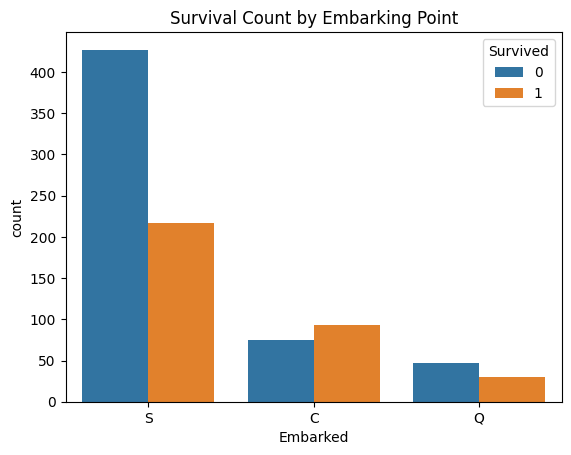

In [ ]:
# Survival Count by Embarking Point
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarking Point')
plt.show()